In [6]:
from vnstock import Vnstock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from statistics import mean
style.use('ggplot')
style.use('fivethirtyeight')
import datetime as dt
import pandas_datareader.data as web
import yfinance as yf
import mplfinance as mpf


In [7]:
start = dt.datetime (2020,1,1)
end = dt.datetime (2025,8,18)

gdp = web.DataReader ('GDP', 'fred', start, end)
gdp

gdp.to_csv ('GDP.csv')

#Parse_dates: convert date-like strings into datetime objects; index_col = 0 : the first column as DataFrame index=
gdp = pd.read_csv('GDP.csv', parse_dates = True, index_col = 0)

gdp.head(6)


,GDP
DATE,
2020-01-01,21727.657
2020-04-01,19935.444
2020-07-01,21684.551
2020-10-01,22068.767
2021-01-01,22656.793
2021-04-01,23368.861


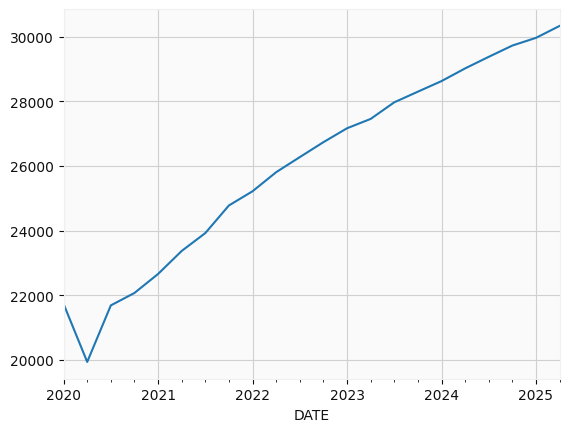

In [12]:
gdp['GDP'].plot()
plt.show()

In [9]:
ticker = 'MWG'

stock = Vnstock().stock(symbol = ticker, source = 'VCI')

df = stock.quote.history(start = '2022-08-22', end = '2025-08-21', interval = '1D')

#Calculate MA100
df['MA20'] = df['close'].rolling(window = 20).mean()
df['MA50'] = df['close'].rolling(window = 50).mean()
df['MA200'] = df['close'].rolling(window = 200).mean()

df.rename(columns={
    "open": "Open",
    "high": "High",
    "low": "Low",
    "close": "Close",
    "volume": "Volume"
}, inplace=True)

# ko vẽ đc mpf.plot nếu drop column: df = df.drop(columns = ['High'])

df.index = pd.to_datetime(df.index)

df = df.dropna(subset = ['MA20'])
df = df.dropna(subset = ['MA50'])
df = df.dropna(subset = ['MA200'])

df

,time,Open,High,Low,Close,Volume,MA20,MA50,MA200
1970-01-01 00:00:00.000000199,2023-06-12,40.35,41.66,40.20,41.66,7251229,38.3225,38.1280,45.83335
1970-01-01 00:00:00.000000200,2023-06-13,42.04,42.04,41.27,41.66,3400762,38.5430,38.2134,45.71955
1970-01-01 00:00:00.000000201,2023-06-14,41.66,41.66,40.73,40.73,3322797,38.7315,38.2812,45.59915
1970-01-01 00:00:00.000000202,2023-06-15,40.73,41.07,40.15,40.40,2812441,38.9060,38.3336,45.47760
1970-01-01 00:00:00.000000203,2023-06-16,40.64,40.98,39.86,40.06,4411810,39.0540,38.3636,45.34660
...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000744,2025-08-15,72.00,72.30,69.80,70.50,9112800,69.6305,66.6856,60.96615
1970-01-01 00:00:00.000000745,2025-08-18,70.60,71.00,69.20,70.00,8199100,69.6800,66.8928,60.99330
1970-01-01 00:00:00.000000746,2025-08-19,70.00,70.00,68.00,68.00,14132300,69.6100,67.0402,61.00550
1970-01-01 00:00:00.000000747,2025-08-20,68.50,70.70,68.10,69.40,11461600,69.6050,67.2078,61.02720


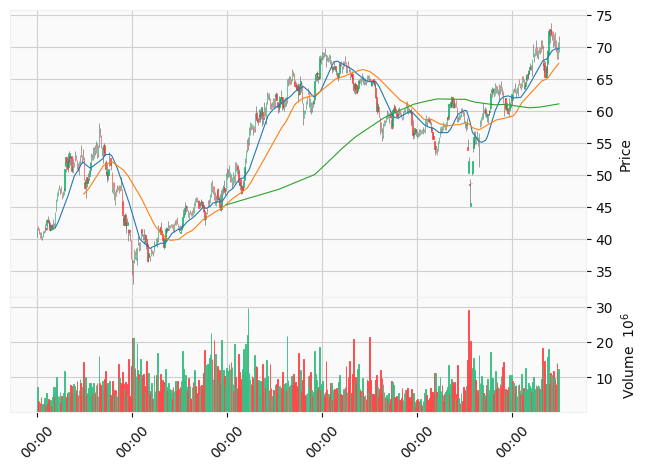

In [10]:
#figsize = chiều dài, chiều rộng
#plt.figure(figsize=(10,5))

#Show lines of chart
# plt.plot(df.index, df['Close'], label="Close Price", color = 'blue')
# plt.plot(df.index, df['MA20'], label="20-day MA", linewidth = 2, color = 'cyan') #line width = độ dày của line
# plt.plot(df.index, df['MA50'], label = '50-day MA', linewidth = 2, color = 'yellow')
# plt.plot(df.index, df['MA200'], label = '200-day MA', linewidth = 2, color = 'red')

mpf.plot(df, type = 'candle', style = 'yahoo', volume = True, mav = (20,50,200))

#Show legend
# plt.legend()

# plt.show()